In [1]:
import pandas as pd

In [4]:
import os
os.getcwd()


'/Users/miztirmizi/Desktop/CryptoClustering'

In [5]:
import pandas as pd

file_path = '/Users/miztirmizi/Desktop/CryptoClustering/crypto_market_data.csv'

df = pd.read_csv(file_path)

df.head()


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


       price_change_percentage_24h  price_change_percentage_7d  \
count                     5.000000                    5.000000   
mean                      0.724746                    6.904276   
std                       1.344477                    7.414786   
min                      -0.378190                   -0.609260   
25%                      -0.211730                    0.049350   
50%                       0.223920                    7.602780   
75%                       1.083880                   10.381340   
max                       2.905850                   17.097170   

       price_change_percentage_14d  price_change_percentage_30d  \
count                     5.000000                     5.000000   
mean                      5.678632                     4.749096   
std                       5.653361                     6.967873   
min                       0.006400                    -0.042370   
25%                       2.249840                     0.131690   
50%

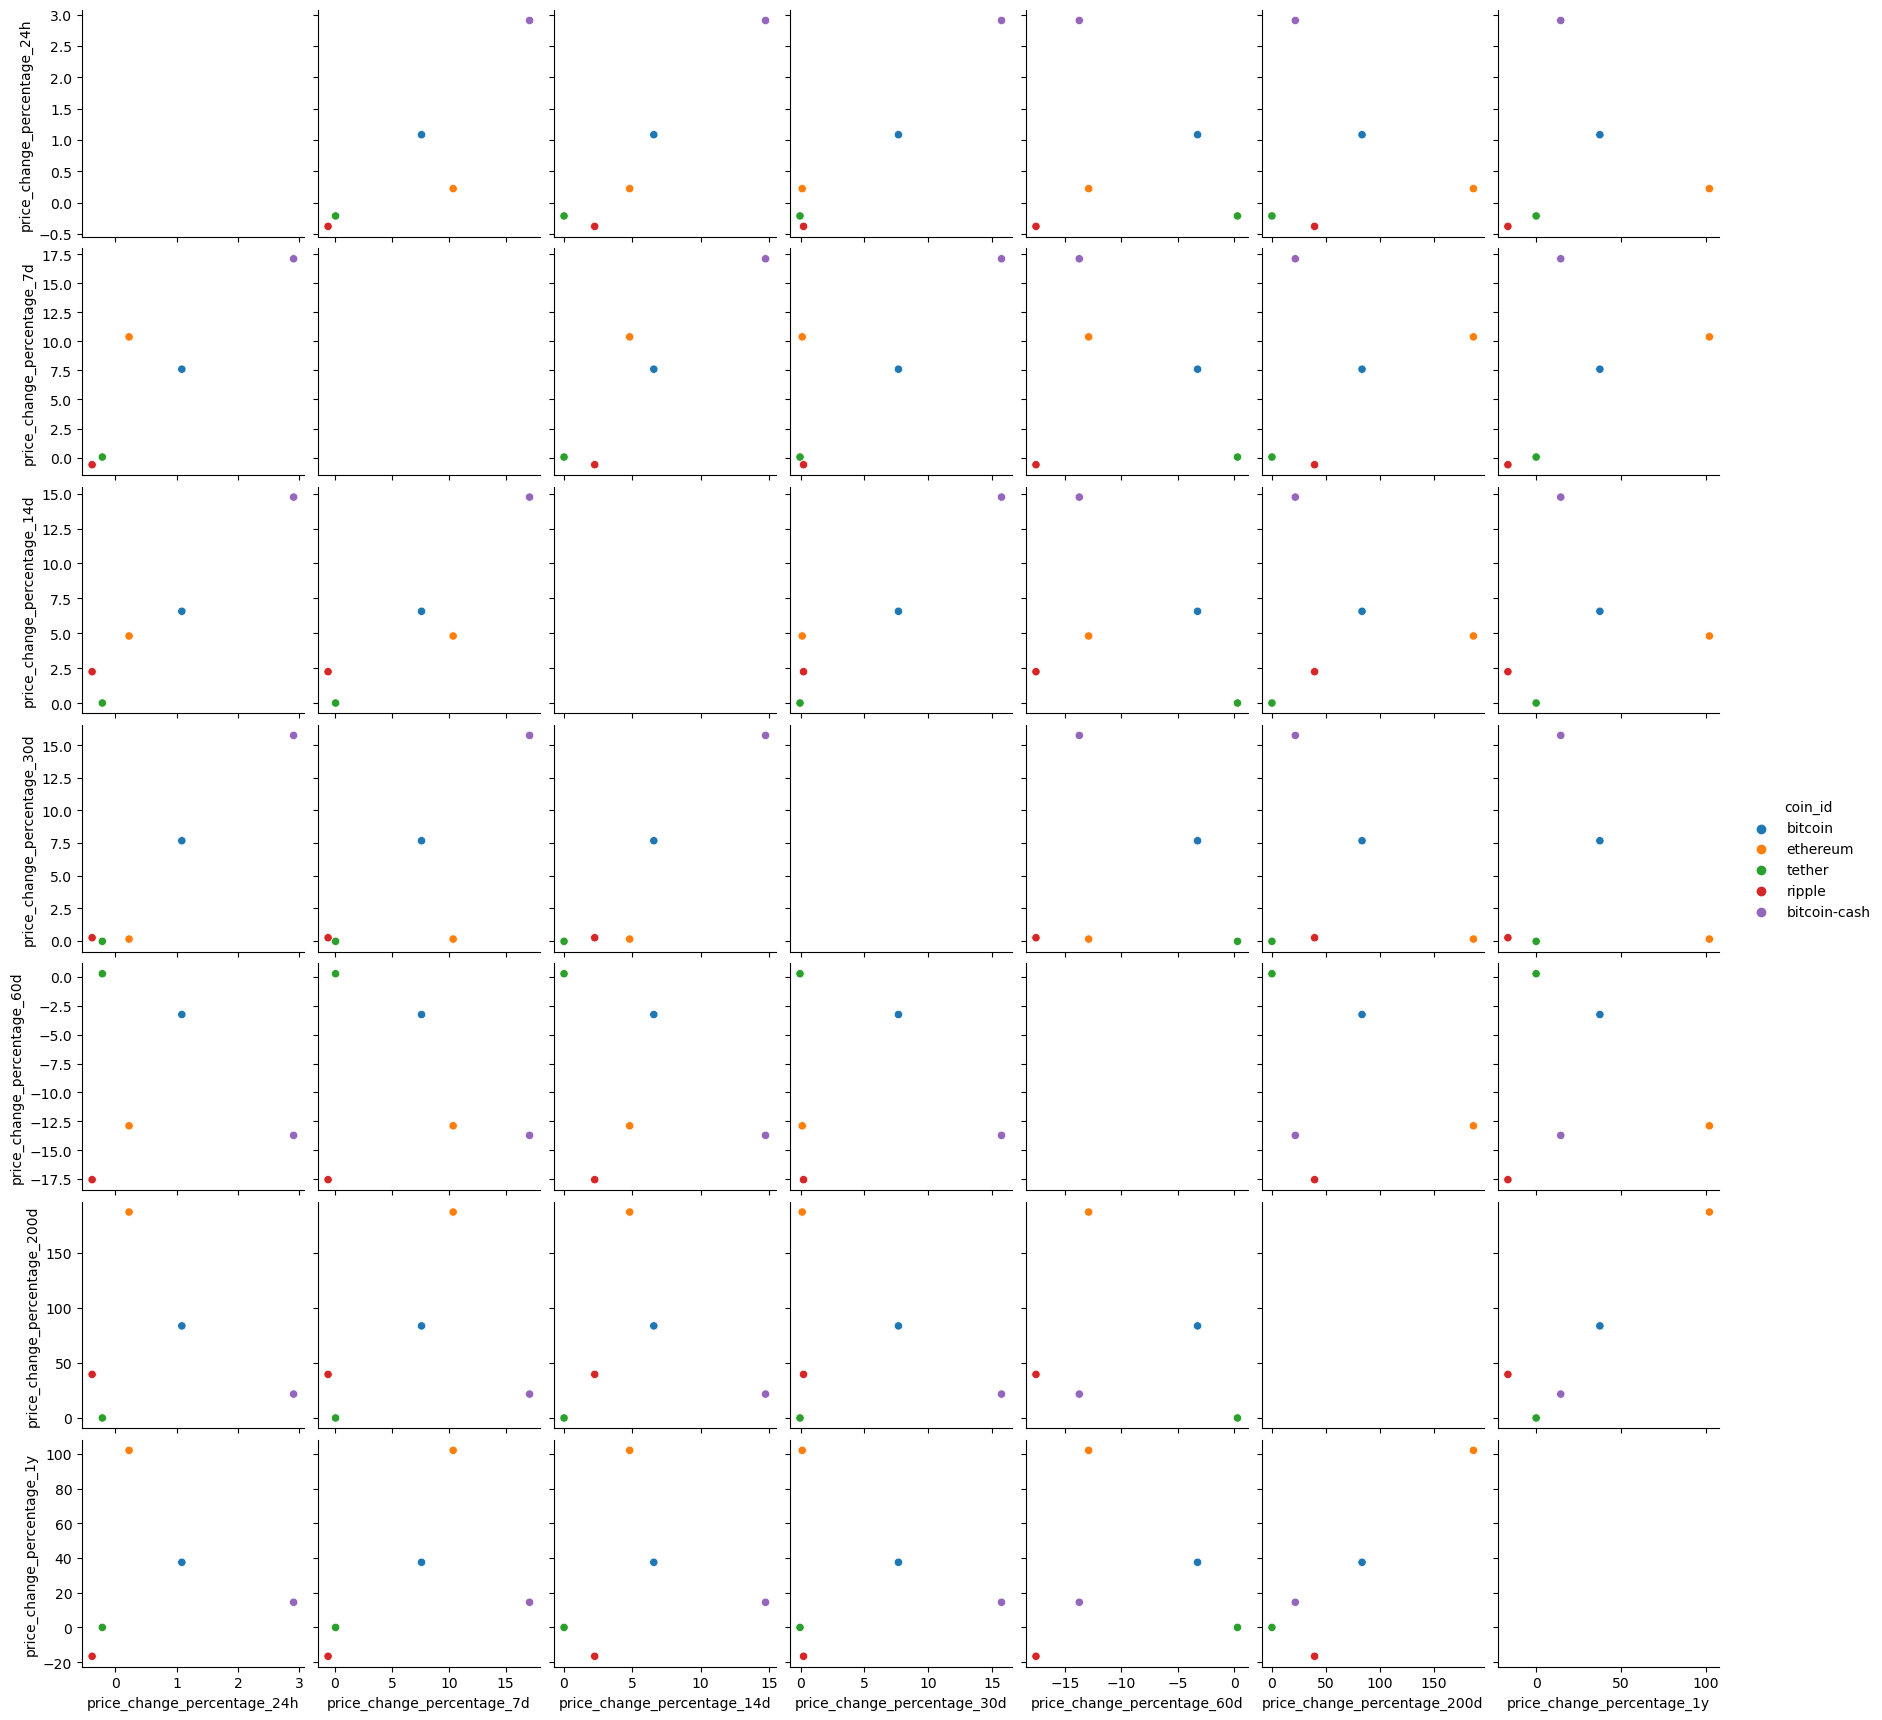

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'coin_id': ['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash'],
    'price_change_percentage_24h': [1.08388, 0.22392, -0.21173, -0.37819, 2.90585],
    'price_change_percentage_7d': [7.60278, 10.38134, 0.04935, -0.60926, 17.09717],
    'price_change_percentage_14d': [6.57509, 4.80849, 0.00640, 2.24984, 14.75334],
    'price_change_percentage_30d': [7.67258, 0.13169, -0.04237, 0.23455, 15.74903],
    'price_change_percentage_60d': [-3.25185, -12.88890, 0.28037, -17.55245, -13.71793],
    'price_change_percentage_200d': [83.51840, 186.77418, -0.00542, 39.53888, 21.66042],
    'price_change_percentage_1y': [37.51761, 101.96023, 0.01954, -16.60193, 14.49384]
}

df = pd.DataFrame(data)

summary_stats = df.describe()
print(summary_stats)

sns.pairplot(df, hue='coin_id')
plt.show()


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [8]:
scaler = StandardScaler()

In [9]:
columns_to_normalize = ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [10]:
# View the first few rows of the normalized data
print(df.head())


        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                     0.298647                    0.105324   
1      ethereum                    -0.416475                    0.524287   
2        tether                    -0.778750                   -1.033616   
3        ripple                    -0.917174                   -1.132924   
4  bitcoin-cash                     1.813752                    1.536929   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.177288                     0.469089   
1                    -0.172083                    -0.740888   
2                    -1.121766                    -0.768817   
3                    -0.678093                    -0.724384   
4                     1.794655                     1.765001   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     0.912765                      0.260116   
1                    -0.511908      

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_normalize = ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']

scaled_df = pd.DataFrame(scaler.fit_transform(df[columns_to_normalize]), columns=columns_to_normalize)

scaled_df['coin_id'] = df['coin_id']  
scaled_df.set_index('coin_id', inplace=True) 

print(scaled_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.298647                    0.105324   
ethereum                        -0.416475                    0.524287   
tether                          -0.778750                   -1.033616   
ripple                          -0.917174                   -1.132924   
bitcoin-cash                     1.813752                    1.536929   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.177288                     0.469089   
ethereum                        -0.172083                    -0.740888   
tether                          -1.121766                    -0.768817   
ripple                          -0.678093                    -0.724384   
bitcoin-cash                     1.794655   

/Users/miztirmizi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/miztirmizi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/miztirmizi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/miztirmizi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

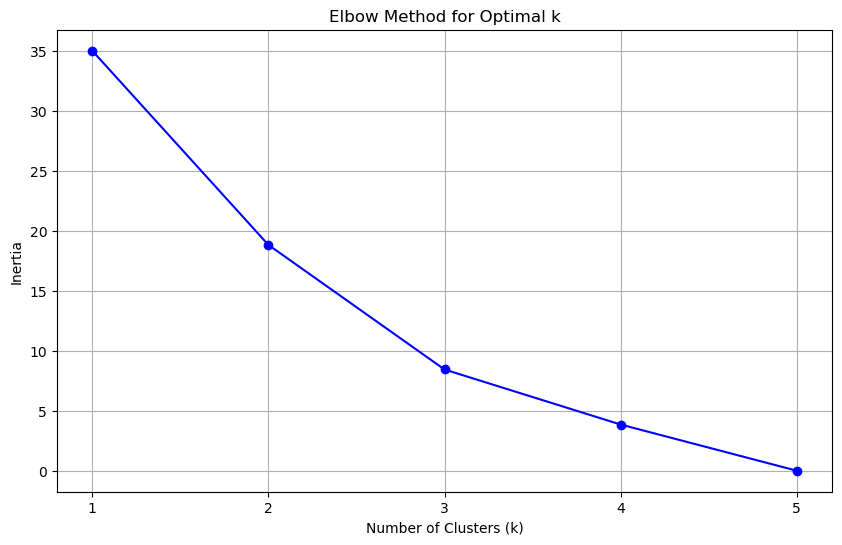

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_values = range(1, 6)

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

elbow_data = {
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values
}

plt.figure(figsize=(10, 6))
plt.plot(elbow_data['Number of Clusters (k)'], elbow_data['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()



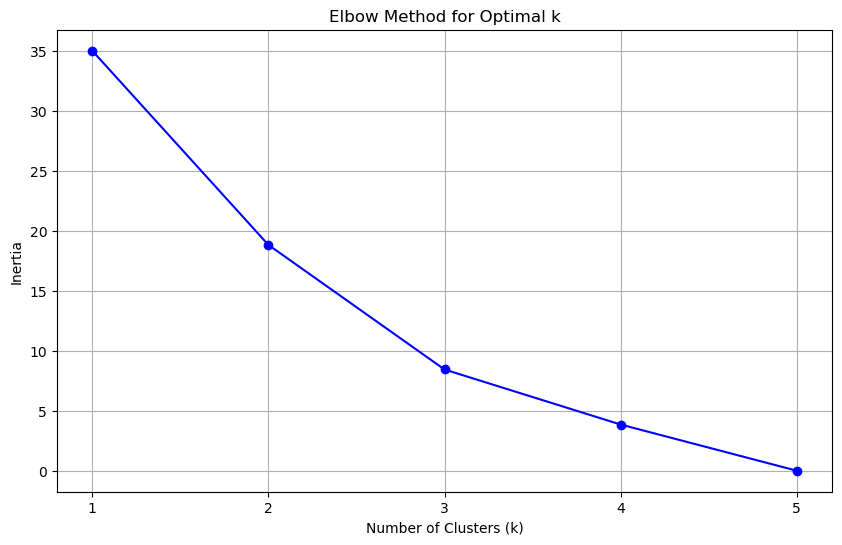

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_values = range(1, 6)

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10) 
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

elbow_data = {
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values
}

plt.figure(figsize=(10, 6))
plt.plot(elbow_data['Number of Clusters (k)'], elbow_data['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [22]:
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

best_k = 3  

kmeans = KMeans(n_clusters=best_k, random_state=0)

kmeans.fit(scaled_df)

clusters = kmeans.predict(scaled_df)

crypto_data_with_clusters = scaled_df.copy()
crypto_data_with_clusters['Cluster'] = clusters

pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df)

explained_variance = pca.explained_variance_ratio_

print("Explained Variance:", explained_variance)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['coin_id'] = scaled_df.index  

merged_df = pd.merge(crypto_data_with_clusters, pca_df, on='coin_id')

scatter_plot = merged_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',  
    cmap='viridis',  
    hover_cols=['coin_id'], 
    title=f'Cryptocurrency Clustering (k={best_k})'
).opts(width=800, height=600)

scatter_plot


Explained Variance: [0.549947   0.30547592 0.13777366]


/Users/miztirmizi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


:Scatter   [PC1]   (PC2,Cluster,coin_id)

In [24]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df)

explained_variance = pca.explained_variance_ratio_

total_explained_variance = sum(explained_variance)

print("Total Explained Variance of the Three Principal Components:", total_explained_variance)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['coin_id'] = scaled_df.index 

print(pca_df.head())


Total Explained Variance of the Three Principal Components: 0.9931965793995362
        PC1       PC2       PC3       coin_id
0  0.408548  0.058427 -1.001290       bitcoin
1 -0.086655  2.797887  0.083215      ethereum
2 -2.128461 -1.194497 -1.009721        tether
3 -1.637537 -0.668999  1.647578        ripple
4  3.444104 -0.992818  0.280219  bitcoin-cash


/Users/miztirmizi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/miztirmizi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/miztirmizi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/miztirmizi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

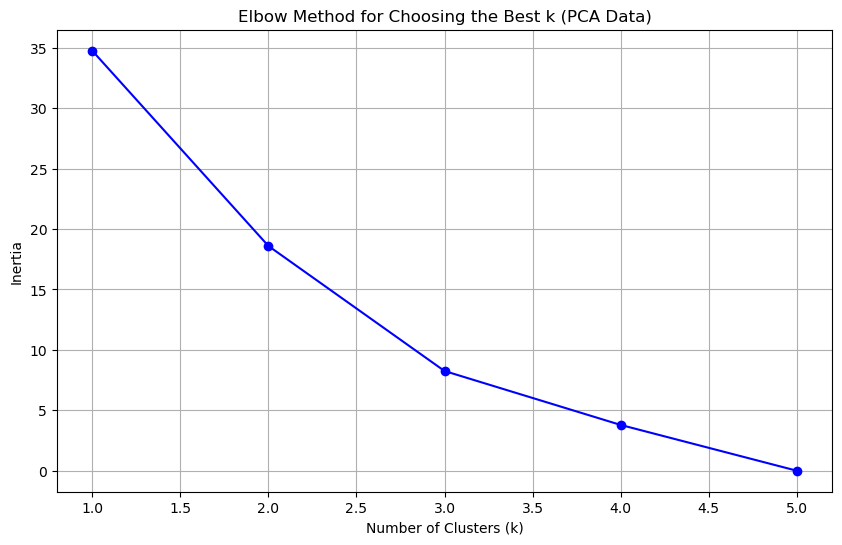

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_values = list(range(1, 6))

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df[['PC1', 'PC2', 'PC3']]) 
    inertia_values.append(kmeans.inertia_)
    
elbow_data_pca = {
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values
}

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Choosing the Best k (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [30]:

pca_df_with_clusters = pca_df.copy()

best_k = 3  
kmeans = KMeans(n_clusters=best_k, random_state=0)

kmeans.fit(pca_df[['PC1', 'PC2', 'PC3']])  

pca_df_with_clusters['Cluster'] = kmeans.labels_

scatter_plot = pca_df_with_clusters.hvplot.scatter(
    x='PC1',  
    y='PC2',  
    c='Cluster',  
    cmap='viridis',  
    hover_cols=['coin_id'], 
    title=f'Cryptocurrency Clustering (k={best_k})'
).opts(width=800, height=600)

scatter_plot


/Users/miztirmizi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


:Scatter   [PC1]   (PC2,Cluster,coin_id)